In [4]:
!pip install yfinance


In [5]:
import yfinance as yf
import pandas as pd
import os

In [6]:
ticker = 'TSLA'
start_d = '2020-01-01'
end_d = '2023-06-19'
data=yf.download(ticker,start=start_d,end=end_d)
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   28.299999   28.713333   28.114000   28.684000   28.684000   
2020-01-03   29.366667   30.266666   29.128000   29.534000   29.534000   
2020-01-06   29.364668   30.104000   29.333332   30.102667   30.102667   
2020-01-07   30.760000   31.441999   30.224001   31.270666   31.270666   
2020-01-08   31.580000   33.232666   31.215334   32.809334   32.809334   
...                ...         ...         ...         ...         ...   
2023-06-12  247.940002  250.970001  244.589996  249.830002  249.830002   
2023-06-13  253.509995  259.679993  251.339996  258.709991  258.709991   
2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
2023-06-16  258.920013  263.600006  257.209

In [7]:
df=pd.DataFrame(data)

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,2020-01-08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 2020-01-02 to 2023-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       871 non-null    float64
 1   High       871 non-null    float64
 2   Low        871 non-null    float64
 3   Close      871 non-null    float64
 4   Adj Close  871 non-null    float64
 5   Volume     871 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.6 KB


In [11]:
df['Date']=pd.to_datetime(df.index)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,2020-01-02
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,2020-01-03
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,2020-01-06
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,2020-01-07
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,2020-01-08


In [17]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=df['Date'],
                                  open=df['Open'],
                                  high=df['High'],
                                  low=df['Low'],
                                  close=df['Close'])])
fig.update_layout(title='Stock Price Chart of TESLA',
                 yaxis_title='prices ($)',
                 xaxis_rangeslider_visible=False)
fig.show()

In [18]:
df.drop(['Date','Volume'],axis=1,inplace=True)

In [19]:
df.reset_index(drop=True,inplace=True)

<AxesSubplot:>

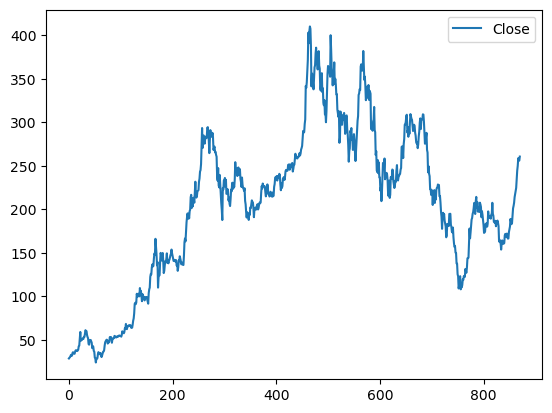

In [21]:
df.plot.line(y='Close',use_index=True)

In [22]:
df.reset_index(drop=True,inplace=True)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x=df[['Open','Close','High','Low','Adj Close']]
y=df['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('mean squared error',mse)

mean squared error 0.4285105118846369


In [25]:
df.tail()

,Open,High,Low,Close,Adj Close
866,247.940002,250.970001,244.589996,249.830002,249.830002
867,253.509995,259.679993,251.339996,258.709991,258.709991
868,260.170013,261.570007,250.500000,256.790009,256.790009
869,248.399994,258.950012,247.289993,255.899994,255.899994
870,258.920013,263.600006,257.209991,260.540009,260.540009


In [29]:
import numpy as np
n_data=np.array([[250.970001,259.679993,261.570007,258.950012,263.600006]])
pred_price=rf.predict(n_data)
print('PREDICTED STOCK PRICE IS:',pred_price[0])

PREDICTED STOCK PRICE IS: 261.6243017578125


C:\Users\soppoju narender\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

